# HW#1 for Math 624: Numerical Analysis

First we import our libraries and the data we're going to fit.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
data=np.load('datafile.npy')

This is my general gradient descent function. "ip" is a numpy array, "h" is a scalar step size, "tol 1" is the scalar tolerance and "m" is a natural denoting the maximum number of allowed iterations. This is analogous to the one I will use to fit the 5th degree polynomial on "data". 

In [2]:
def GD(ip, h, tol1, m):
    x_old = ip
    num_iter = 0
    
    x_list = [x_old]
    z_list = [g(x_old)]
    
    x_new = x_old - grad_g(x_old)
    x_list.append(x_new)
    z_list.append(g(x_new))
    
    while num_iter < m and (abs(x_new[0] - x_old[0]) + abs(x_new[1] - x_old[1])) > tol1:
        x_old = x_new
        direction = -1*h*grad_g(x_old)
        x_new = x_old + direction
        x_list.append(x_new)
        z_list.append(g(x_new))
        num_iter += 1
        
    print ("Local minimum occurs at:", x_new)
    print ("Number of steps:", num_iter)
    print ("minimum value is:", g(x_new))

This function finds the value of a "dth" degree polynomial at "x" given a list of coefficients "a".

In [3]:
def p(a,x,d):
    val = 0
    for i in range(0,d+1):
        val += a[i]*x**i
    return val

This is our cost function. "a" will consistently be our parameter that is a np array of changing coefficients just as "data_points" will consistently be our parameter containing the data points to sum over.

In [4]:
def g(a, data_points):
    sum = 0
    for point in data_points:
        sum += (p(a,point[0],5) - point[1])**2
    return sum

This is our gradient function. It returns a vector of size d+1 and invokes the chain rule. Note that in the loss function, $$(p(x_i)-y_i)^2 = (y_i - p(x_i))^2 $$ so if you want to use the chain rule and avoid multiplying by -1, you can just switch the order like above. We don't need the 2 factor outside our sum since wherever the gradient is very close to 0, you can divide 2 and the gradient will still be very close to 0. 


In [5]:
def grad_g(a, data_points):
    gradient = np.array([0,0,0,0,0,0])
    
    for i in range(len(gradient)):
        sum = 0
        
        for point in data_points:
            sum += (p(a,point[0],5) - point[1]) * point[0]**i
            
        gradient[i] = sum
    
    return gradient

In [6]:
# The norm of a general vector in R^n
def norm(arr):
    n = 0
    for el in arr:
        n += el**2     
    return n**0.5

In [7]:
def GDnew(ip, h, tol1, m, data_points):
    # Our initial vector and the number of iterations declared and assigned
    x_old = ip
    num_iter = 0
    
    # Our list of x and "g" values that will log all the passing values of x and g(x)
    x_list = [x_old]
    g_list = [g(x_old, data_points)]
    
    # Our second vector x_1 which is computed with the norm of the gradient
    # and then added to the list of x vectors
    x_new = x_old - grad_g(x_old, data_points)/norm(grad_g(x_old, data_points))
    x_list.append(x_new)
    g_list.append(g(x_new, data_points))
    
    # Loops until we hit our max iterations or the sum of errors are below our tolerance
    while num_iter < m and (abs(x_new[0] - x_old[0]) + abs(x_new[1] - x_old[1]) + abs(x_new[2] - x_old[2]) + abs(x_new[3] - x_old[3]) + abs(x_new[4] - x_old[4]) + abs(x_new[5] - x_old[5])) > tol1:
        x_old = x_new
        direction = -1*h*grad_g(x_old, data_points)/norm(grad_g(x_old, data_points))*1.0
        x_new = x_old + direction
        x_list.append(x_new)
        g_list.append(g(x_new, data_points))
        num_iter += 1
        
    print ("Local minimum occurs at:", x_new)
    print ("Number of steps:", num_iter)
    print ("minimum value is:", g(x_new, data_points))

The "arr" list serves as our initial point and "arr2" serves as our object containing the weights of our polynomial. Increasing the maximum number of iterations and decreasing the step size will make the minimum value go smaller.

In [8]:
arr = np.array([0,0,0,0,0,0])
arr2 = GDnew(arr, 0.005, 0.001, 50000, data)

Local minimum occurs at: [ 0.76968247  0.71407981  0.86516394  0.63230299 -0.98290423  0.20647847]
Number of steps: 50000
minimum value is: 2502.08677072


This just plots our estimated function (blue) against the data points (red).

In [9]:
def f(x):
    return 0.76968247 + 0.71407981*x + 0.86516394*x**2 + 0.63230299*x**3 + -0.98290423*x**4 + 0.20647847*x**5

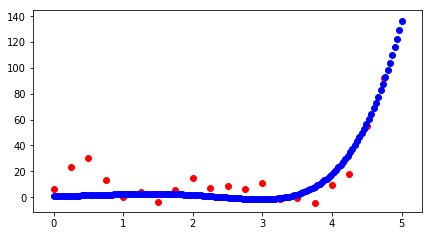

In [10]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7]) 
axes.scatter(data[:,0],data[:,1],c="r");

new_x = np.linspace(0, 5, 150)
new_y = f(new_x)

axes.scatter(new_x,new_y,c="b")